# Pre-workshop: Installing required libraries

In [226]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install seaborn


# Step 1: Import important libraries

In [227]:
import pandas as pd

import csv
import re # for regular expression
import string
from datetime import datetime

import nltk 
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 

import numpy as np 
import matplotlib.pyplot as plt

import seaborn


#import plotly
#import plotly.plotly as py
#import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='XXXXXX', api_key='XXXXXXX')

%matplotlib inline


In [228]:
# change the seeting of the cells to show the entire content of coulmn ( eexpand the size of coulmn)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [229]:
#!pwd

In [411]:
# read csv file and save it in a data frame
data_df=pd.read_csv('Data.csv') 

# Step 3: Explore that data

In [412]:
# how much data do I have?
len(data_df)

4111

In [266]:
# do not run this code. it will take up all of your memory
#data_df

In [267]:
# How about if I want to see part of the data?
data_df.head(10)

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,Negative
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,Negative
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,Negative
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,Negative
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,Negative
5,2019-09-19 13:26:05,osamah3343,Not given,0,كل البنوك سيئين #الراجحي_أسوء_بنك_في_السعودية,Not given,https://twitter.com/osamah3343/status/1174676033880154112,not noise,كل البنوك سيئين الراجحياسوءبنكفيالسعوديه,40,not null,0,3,related,Negative
6,2019-09-18 21:52:08,As6ooorh1Amani,Not given,0,@AlRajhiBank اسوء بنك في السعوديه بنك #الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,@AlRajhiBank,https://twitter.com/As6ooorh1Amani/status/1174440997947920391,not noise,اسوء بنك في السعوديه بنك الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,144,not null,0,1,related,Negative
7,2019-09-17 6:36:59,t_i700,Not given,0,@AlRajhiBankCare رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد للمكالمات فقط بدون رد او حل #الراجحي_أسوء_بنك_في_السعودية,@AlRajhiBankCare,https://twitter.com/t_i700/status/1173848305828356096,not noise,رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد لمكالمات فقط بدون رد او حل الراجحياسوءبنكفيالسعوديه,109,not null,0,2,related,Negative
8,2019-09-15 13:02:36,abdulla_nofal,Not given,0,#الراج

In [85]:
data_df.tail(3)

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment
4108,2015-05-12 22:35:50,10Ali1408,Not given,0,#اضراب_موظفي_الراجحي #الراجحي موظفو مصرف شهير يشتكون الفصل التعسفي ومضايقة الادارة صحيفة الوئام الالكترونية http://weam.co/?p=337217,Not given,https://twitter.com/10Ali1408/status/598255289150767105,not noise,اضرابموظفيالراجحي الراجحي موظفو مصرف شهير يشتكون الفصل التعسفي ومضايقه الاداره صحيفه الوئام الالكترونيه,104,not null,0,0,related,neutral
4109,2015-05-12 22:33:54,kem19996,Not given,0,يوم الرواتب ٢٥ مافيه رواتب #اضراب_موظفي_الراجحي,Not given,https://twitter.com/kem19996/status/598254802955472897,not noise,يوم الرواتب ٢٥ مافيه رواتب اضرابموظفيالراجحي,44,not null,0,0,related,neutral
4110,2015-05-12 22:29:03,mjed_z,Not given,0,#اضراب_موظفي_الراجحي اكتبوا في قوقل ( الديوان الملكي ) وسجلوا وارفعوا برقيات,Not given,https://twitter.com/mjed_z/status/598253582719193090,not noise,اضرابموظفيالراجحي اكتبوا في قوقل الديوان الملكي وسجلوا وارفعوا برقيات,69,not null,0,0,related,neutral


In [86]:
# Print a concise summary of a DataFrame
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 15 columns):
date           4111 non-null object
username       4111 non-null object
to             4111 non-null object
retweets       4111 non-null int64
text           4111 non-null object
mentions       4111 non-null object
permalink      4111 non-null object
is Noise       4111 non-null object
clean text     4111 non-null object
text length    4111 non-null int64
is null        4111 non-null object
pos_count      4111 non-null int64
neg_count      4111 non-null int64
related?       4111 non-null object
sentiment      4111 non-null object
dtypes: int64(4), object(11)
memory usage: 481.9+ KB


In [87]:
# number of non-NA values
data_df.count()

date           4111
username       4111
to             4111
retweets       4111
text           4111
mentions       4111
permalink      4111
is Noise       4111
clean text     4111
text length    4111
is null        4111
pos_count      4111
neg_count      4111
related?       4111
sentiment      4111
dtype: int64

In [88]:
#Generates descriptive statistics or Summary Statistic of the numeric columns
data_df.describe()

,retweets,text length,pos_count,neg_count
count,4111.000000,4111.000000,4111.000000,4111.000000
mean,0.791778,77.331063,0.118463,0.229141
std,10.290853,49.436805,0.367575,0.501615
min,0.000000,8.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.000000
50%,0.000000,65.000000,0.000000,0.000000
75%,0.000000,105.000000,0.000000,0.000000
max,496.000000,279.000000,3.000000,3.000000


In [89]:
# Retrieve list of columns
data_df.columns

Index(['date', 'username', 'to', 'retweets', 'text', 'mentions', 'permalink',
       'is Noise', 'clean text', 'text length', 'is null', 'pos_count',
       'neg_count', 'related?', 'sentiment'],
      dtype='object')

# Step 5.a: Clean the data

We need to handel missing data by going through each value and fix errors and missing values

Reasons why data is missing:

    - User forgot to fill in a field.
    - Data was lost while transferring manually from a legacy database.
    - There was a programming error.
    - Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

In [90]:
# Any missing values?
data_df.isnull().values.any()

False

In [91]:
# Total missing values for each feature
data_df.isnull().sum()

date           0
username       0
to             0
retweets       0
text           0
mentions       0
permalink      0
is Noise       0
clean text     0
text length    0
is null        0
pos_count      0
neg_count      0
related?       0
sentiment      0
dtype: int64

### Figure out why the data is missing

Is this value missing becuase it wasn't recorded or becuase it dosen't exist?

In [92]:
# Replace missing values because it doesn't exist
data_df['text'].fillna("Not given", inplace=True)

In [93]:
# will do the same for 'to/mentions' and 'City/Urban Area'
data_df['to'].fillna("Not given", inplace=True)

In [94]:
data_df['mentions'].fillna("Not given", inplace=True)

# Step 5.b: Preprocess the text

First, we build a method that can process each tweet

In [95]:
# remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [96]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [97]:
# remove repeated letters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [98]:
#start processing the tweet
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
        
    return tweet

In [99]:
# remove Arabic stop words from the tweets
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ar_stops = set(stopwords.words('arabic'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shammaaas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
#print (ar_stops)

In [101]:
# remove Arabic stop words from the tweets
for word in data_df['text']:
    if word in ar_stops:        
        words_filtered.remove(word)

In [102]:
# apply the method in all the text and creat another cloumn with the processed text
data_df["clean text"] = data_df['text'].apply(lambda x: processPost(x))

In [103]:
# check the new column
data_df.head(20)

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative
5,2019-09-19 13:26:05,osamah3343,Not given,0,كل البنوك سيئين #الراجحي_أسوء_بنك_في_السعودية,Not given,https://twitter.com/osamah3343/status/1174676033880154112,not noise,كل البنوك سيئين الراجحياسوءبنكفيالسعوديه,40,not null,0,3,related,negative
6,2019-09-18 21:52:08,As6ooorh1Amani,Not given,0,@AlRajhiBank اسوء بنك في السعوديه بنك #الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,@AlRajhiBank,https://twitter.com/As6ooorh1Amani/status/1174440997947920391,not noise,اسوء بنك في السعوديه بنك الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,144,not null,0,1,related,negative
7,2019-09-17 6:36:59,t_i700,Not given,0,@AlRajhiBankCare رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد للمكالمات فقط بدون رد او حل #الراجحي_أسوء_بنك_في_السعودية,@AlRajhiBankCare,https://twitter.com/t_i700/status/1173848305828356096,not noise,رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد لمكالمات فقط بدون رد او حل الراجحياسوءبنكفيالسعوديه,109,not null,0,2,related,negative
8,2019-09-15 13:02:36,abdulla_nofal,Not given,0,#الراج

In [104]:
data_df['text length'] = data_df['clean text'].apply(len)

In [105]:
# Remove nosiy tweets
noise=["خصم","كود الخصم", "للتواصل" ,"قبل الحلم","لماذا","شقق","الله اكبر","افخم","حلول","واجبات","خصومات","كن من الذاكرين","فاتوره","فاتورة","كن داعيا للخير","سنابي","استقرامي","ذكر الله ","شعارات ","بيت قصيده","فلاتر","سناب","الله","تصحيح النظر","الماء الابيض","طب العيون"]

In [106]:
def remove_noise(tweet):
    label="not noise"
    for word in noise:
        if word in tweet:
            label="noise"

    return label

In [107]:
# apply the method
data_df["is Noise"] = data_df['text'].apply(lambda x: remove_noise(x))

In [108]:
data_df.head()

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative


In [109]:
# remove the noise
data_df=data_df[data_df["is Noise"]!="noise"]

In [110]:
len(data_df)

4111

In [111]:
# Remove null tweets
nulltweet=["Not given"]

In [112]:
def remove_nulltweet(tweet):
    label="not null"
    for word in nulltweet:
        if word in tweet:
            label="null"

    return label

In [113]:
# apply the method
data_df["is null"] = data_df['text'].apply(lambda x: remove_nulltweet(x))

In [114]:
# remove the null tweets
data_df=data_df[data_df["is null"]!="null"]

In [115]:
len(data_df)

4111

In [116]:
Related = ["الراجحي_أسوء_بنك_في_السعودية","بنك","اسوء","مصرف الراجحي","الراجحي","قاطعوا بنك الراجحي","رايك في بنك الراجحي","قاطعوا مصرف الراجحي","#قاطعوا_مصرف_الراجحي"]

In [117]:
def remove_notrelated(tweet):
    label="not related"
    for word in Related:
        if word in tweet:
            label="related"

    return label

In [118]:
# apply the method
data_df["related?"] = data_df['text'].apply(lambda x: remove_notrelated(x))

In [119]:
# remove the not related
data_df=data_df[data_df["related?"]!="not related"]

In [120]:
len(data_df)

4111

# 

#  a quick classification to see if the people are with or agent the bank

In [121]:
# read positive words list
pos_df=pd.read_csv("with the bank.csv")

In [122]:
pos_df

,word
0,المبدع
1,احلى
2,ممتاز
3,ادمنتها
4,تفوز
5,بطلق
6,طررر
7,روعه
8,اعجبني
9,رائعة


In [123]:
pos_list=pos_df["word"].values.tolist()

In [124]:
def pos_sentiment(tweet):
    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in pos_list:
        
        if word in tweet:
            count+=1
    
    return count

In [125]:
#apply the method to the data
data_df["pos_count"] = data_df['clean text'].apply(lambda x: pos_sentiment(x))

In [126]:
data_df.head()

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative


In [127]:
# read negative words list
neg_df=pd.read_csv("against the bank.csv")

In [128]:
neg_df

,words
0,فقع كبدي
1,سيء
2,سيئ
3,امدحكم
4,معلق
5,اسوء
6,اخيس
7,نشتكي
8,فشل
9,سيئين


In [129]:
neg_list=neg_df["words"].values.tolist()

In [130]:
def neg_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in neg_list:
        if word in tweet:
            count+=1
               
    return count

In [131]:
#apply the method to the data
data_df["neg_count"] = data_df['clean text'].apply(lambda x: neg_sentiment(x))

In [132]:
def tweet_sentiment(tweet):
    
    pos_sent=pos_sentiment(tweet)
    
    neg_sent=neg_sentiment(tweet)
    
    if pos_sent > neg_sent:
        label = "Positive"
    
    elif pos_sent < neg_sent:
        label = "Negative"
    else:
        label = "Negative" 
   
   
    return label

In [133]:
data_df.head(100)

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative
5,2019-09-19 13:26:05,osamah3343,Not given,0,كل البنوك سيئين #الراجحي_أسوء_بنك_في_السعودية,Not given,https://twitter.com/osamah3343/status/1174676033880154112,not noise,كل البنوك سيئين الراجحياسوءبنكفيالسعوديه,40,not null,0,3,related,negative
6,2019-09-18 21:52:08,As6ooorh1Amani,Not given,0,@AlRajhiBank اسوء بنك في السعوديه بنك #الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,@AlRajhiBank,https://twitter.com/As6ooorh1Amani/status/1174440997947920391,not noise,اسوء بنك في السعوديه بنك الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,144,not null,0,1,related,negative
7,2019-09-17 6:36:59,t_i700,Not given,0,@AlRajhiBankCare رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد للمكالمات فقط بدون رد او حل #الراجحي_أسوء_بنك_في_السعودية,@AlRajhiBankCare,https://twitter.com/t_i700/status/1173848305828356096,not noise,رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد لمكالمات فقط بدون رد او حل الراجحياسوءبنكفيالسعوديه,109,not null,0,2,related,negative
8,2019-09-15 13:02:36,abdulla_nofal,Not given,0,#الراج

# 

In [134]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["clean text"].apply(tokenizer.tokenize)

In [135]:
data_df.head()

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment,tokens
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative,"[ايالبنوكاسهلتعاملمعالناس, مهما, توفرت, التطبيقات, والخدمات, في, الراجحي, الا, انه, اسوء, بنك, في, السعوديه, وصعب, التفاهم, والتعامل, معهم, والموظف, ما, يمكن, يخدمك, الا, اذا, معك, بلاتيني, البنوك, الثانيه, ع, ضعف, خدماتها, الا, انها, تسعي, تلبي, حاجاتك, وموظفينهم, يحترمون, العميل, ويكسبونه]"
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative,"[لاسف, اسوء, بنك, في, السعوديه, هو, الراجحي, وشي, اخر, انهم, من, اربح, البنوك, في, السعوديه, وما, افتكر, ان, لهم, اي, مشاريع, الي, تساعد, او, Give, back, to, the, comunities, في, سته, اشهر, فقط, هاذي, ارباحهم]"
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative,"[قاطعوامصرفالراجحي, اسوء, بنك, بالملكه, العربيه, السعوديه, وبنك, جدا, قديم, فالتعاملات, وعلي, كثر, شكوي, نص, الشعب, الا, ان, البنك, لاحياه, لمن, تنادي, مافي, تجاوب, لعملاء, في, تطوير, خدماته]"
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative,"[اسوء, بنك, موجود, في, السعوديه, قاطعوامصرفالراجحي]"
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative,"[خذقسطكمنالراجحي, الراجحي, استغل, الدعايه, الاسلاميه, لبنك, اسوء, استغلال, في, ظل, تورع, المواطنين, عن, البنوك, الاخرا, مع, انه, لايختلف, ان, اي, بنك, اخر, في, السعوديه, فمثلا, الراجحي, ياخذ, رسوم, علي, اصدار, بطاقه, الصراف, خلاف, البنوك, الاخري, والان, زاد, وياخذ, رسوم, في, حاله, القرض, الشخصي, ١٥٠, وش, حلها]"


In [136]:
all_words = [word for tokens in data_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_df["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

49069 words total, with a vocabulary size of 11633
Max sentence length is 57


In [137]:
# count the number of words
word_counter = Counter(all_words)

In [138]:
# show the most common words
word_counter.most_common(10)

[('قاطعوامصرفالراجحي', 2176),
 ('رايكفيمصرفالراجحي', 1225),
 ('من', 1094),
 ('بنك', 1042),
 ('في', 827),
 ('الراجحي', 743),
 ('البنوك', 374),
 ('الي', 372),
 ('علي', 351),
 ('مصرف', 330)]

In [139]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('الس', 1),
 ('الفصل', 1),
 ('التعسفي', 1),
 ('ومضايقه', 1),
 ('الوئام', 1),
 ('اكتبوا', 1),
 ('الديوان', 1),
 ('وسجلوا', 1),
 ('وارفعوا', 1),
 ('برقيات', 1)]

In [140]:
# store the top 20 words in a new data frame
lst = word_counter.most_common(20)
word_df = pd.DataFrame(lst, columns = ['Word', 'Count'])

In [141]:
word_df.head()

,Word,Count
0,قاطعوامصرفالراجحي,2176
1,رايكفيمصرفالراجحي,1225
2,من,1094
3,بنك,1042
4,في,827


In [142]:
word_df.set_index('Word', inplace=True)

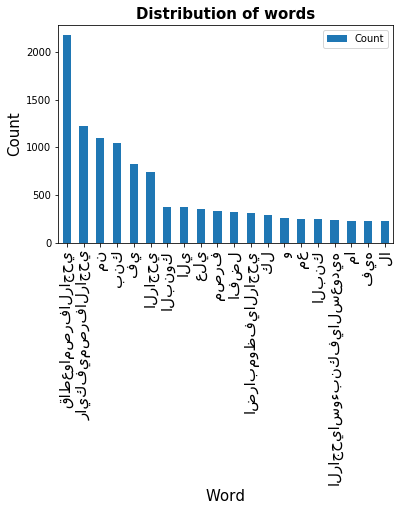

In [143]:
# visualize the top 20 words

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15,rotation=45)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Word', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Distribution of words', fontsize=15, fontweight='bold')

word_df.plot(ax=ax, kind='bar')

# 

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [145]:
# change values to numeric
data_df['sentiment'] = data_df['sentiment'].map({'neutral': 1,'positive': 1, 'negative': 0}) 

In [146]:
# remove data with NAN stance
data_df=data_df[~data_df["sentiment"].isna()]

In [147]:
# idneitfy the data and the labels
data= data_df['clean text']
target= data_df['sentiment']

In [148]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(4111, 11582)

In [149]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

In [150]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2055, 11582) (2056, 11582) (2055,) (2056,)


# Classifier 3: Logistic 

In [151]:
# build the classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [152]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

Logisitic Accuracy: 0.73

10-fold cross-validation:
[0.69417476 0.77372263 0.78345499 0.78345499 0.8296837  0.86861314
 0.79562044 0.81995134 0.75425791 0.67396594]
The average accuracy of the Logisitic classifier is : 0.78

Confusion matrix of the Logisitic classifier:
[[1156   30]
 [ 516  354]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1186
           1       0.92      0.41      0.56       870

    accuracy                           0.73      2056
   macro avg       0.81      0.69      0.69      2056
weighted avg       0.79      0.73      0.71      2056

----------------------------------------------------------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [153]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

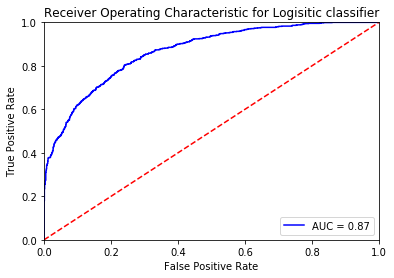

In [154]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 

In [413]:
system_df=pd.read_csv("system.csv")

In [414]:
system_df

,words
0,System not work
1,عطلان
2,نظامه
3,الستم
4,النظام
5,نظامهم
6,System down
7,نظام
8,معطل
9,السيستم


In [415]:
system_list=system_df["words"].values.tolist()

In [416]:
def system_sentiment(tweet):
    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in system_list:
        
        if word in tweet:
            count+=1
    
    return count

In [417]:
#apply the method to the data
data_df["system_count"] = data_df['clean text'].apply(lambda x: system_sentiment(x))

In [418]:
data_df.head()

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment,system_count
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative,0
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative,0
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative,0
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative,0
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative,1


In [419]:
services_df=pd.read_csv("services.csv")

In [420]:
services_df

,words
0,معامله
1,خدمه
2,عدم الرد
3,تعامل
4,من فوق خشمهم
5,اخلاق الموظفين زفت
6,تعاملهم
7,خدمه العملاء
8,الموظف
9,تعامل سيئ


In [421]:
services_list=services_df["words"].values.tolist()

In [422]:
def services_sentiment(tweet):    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in services_list:
        
        if word in tweet:
            count+=1
    
    return count


In [423]:
#apply the method to the data
data_df["services_count"] = data_df['clean text'].apply(lambda x: services_sentiment(x))

In [424]:
data_df.head()

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment,system_count,services_count
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative,0,3
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative,0,0
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative,0,2
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative,0,0
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative,1,0


In [425]:
def tweet_sentiment2(tweet):
    
    system_sent=system_sentiment(tweet)
    
    services_sent=services_sentiment(tweet)
    
    if system_sent > services_sent:
        label = "system"
    
    elif system_sent < services_sent:
        label = "servicee"
    else:
        label = "else" 
   
   
    return label

In [426]:
data_df["reason"] = data_df['clean text'].apply(lambda x: tweet_sentiment2(x))

In [427]:
data_df.head(10)

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment,system_count,services_count,reason
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative,0,3,servicee
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,negative,0,0,else
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative,0,2,servicee
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,negative,0,0,else
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative,1,0,system
5,2019-09-19 13:26:05,osamah3343,Not given,0,كل البنوك سيئين #الراجحي_أسوء_بنك_في_السعودية,Not given,https://twitter.com/osamah3343/status/1174676033880154112,not noise,كل البنوك سيئين الراجحياسوءبنكفيالسعوديه,40,not null,0,3,related,negative,0,0,else
6,2019-09-18 21:52:08,As6ooorh1Amani,Not given,0,@AlRajhiBank اسوء بنك في السعوديه بنك #الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,@AlRajhiBank,https://twitter.com/As6ooorh1Amani/status/1174440997947920391,not noise,اسوء بنك في السعوديه بنك الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,144,not null,0,1,related,negative,1,3,servicee
7,2019-09-17 6:36:59,t_i700,Not given,0,@AlRajhiBankCare رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد للمكالمات فقط بدون رد او حل #الراجحي_أسوء_بنك_في_السعودية,@AlRajhiBankCare,https://twitter.com/t_i700/status/1173848305828356096,not noise,رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد لمكالمات فقط بدون رد او حل ا

In [306]:
# remove the "else" class
data_df=data_df[data_df['reason'] != "servicee"]

In [307]:
len(data_df)

3191

In [308]:
data_df.head(10)

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment,tokens,system_count,services_count,reason
1,2019-12-17 16:42:29,MuhanedID,INTERCEPTOR_JED,0,للاسف اسوء بنك في السعوديه هو الراجحي @alrajhibank_en ...وشي آخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع اللي تساعد او Give back to the communities ... في ستة أشهر فقط هاذي ارباحهم.. https://twitter.com/Moe74198110/status/1206977020720107521/photo/1,@alrajhibank_en,https://twitter.com/MuhanedID/status/1206977977277276160,not noise,لاسف اسوء بنك في السعوديه هو الراجحي وشي اخر انهم من اربح البنوك في السعوديه وما افتكر ان لهم اي مشاريع الي تساعد او Give back to the comunities في سته اشهر فقط هاذي ارباحهم,174,not null,0,1,related,0,"['لاسف', 'اسوء', 'بنك', 'في', 'السعوديه', 'هو', 'الراجحي', 'وشي', 'اخر', 'انهم', 'من', 'اربح', 'البنوك', 'في', 'السعوديه', 'وما', 'افتكر', 'ان', 'لهم', 'اي', 'مشاريع', 'الي', 'تساعد', 'او', 'Give', 'back', 'to', 'the', 'comunities', 'في', 'سته', 'اشهر', 'فقط', 'هاذي', 'ارباحهم']",0,0,else
3,2019-11-01 18:11:39,dhouom77,Not given,0,اسوء بنك موجود في السعوديه #قاطعوا_مصرف_الراجحي,Not given,https://twitter.com/dhouom77/status/1190330577825734656,not noise,اسوء بنك موجود في السعوديه قاطعوامصرفالراجحي,44,not null,0,1,related,0,"['اسوء', 'بنك', 'موجود', 'في', 'السعوديه', 'قاطعوامصرفالراجحي']",0,0,else
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,0,"['خذقسطكمنالراجحي', 'الراجحي', 'استغل', 'الدعايه', 'الاسلاميه', 'لبنك', 'اسوء', 'استغلال', 'في', 'ظل', 'تورع', 'المواطنين', 'عن', 'البنوك', 'الاخرا', 'مع', 'انه', 'لايختلف', 'ان', 'اي', 'بنك', 'اخر', 'في', 'السعوديه', 'فمثلا', 'الراجحي', 'ياخذ', 'رسوم', 'علي', 'اصدار', 'بطاقه', 'الصراف', 'خلاف', 'البنوك', 'الاخري', 'والان', 'زاد', 'وياخذ', 'رسوم', 'في', 'حاله', 'القرض', 'الشخصي', '١٥٠', 'وش', 'حلها']",1,0,system
5,2019-09-19 13:26:05,osamah3343,Not given,0,كل البنوك سيئين #الراجحي_أسوء_بنك_في_السعودية,Not given,https://twitter.com/osamah3343/status/1174676033880154112,not noise,كل البنوك سيئين الراجحياسوءبنكفيالسعوديه,40,not null,0,3,related,0,"['كل', 'البنوك', 'سيئين', 'الراجحياسوءبنكفيالسعوديه']",0,0,else
8,2019-09-15 13:02:36,abdulla_nofal,Not given,0,#الراجحي_أسوء_بنك_في_السعودية مع,Not given,https://twitter.com/abdulla_nofal/status/1173220570420432896,not noise,الراجحياسوءبنكفيالسعوديه مع,27,not null,0,1,related,1,"['الراجحياسوءبنكفيالسعوديه', 'مع']",0,0,else
10,2019-06-29 20:11:06,taheroraibi115,AlRajhiBank,0,اسوء بنك الان في السعوديه اسدد القرض وغادر منه وكسر جميع صرفاته,Not given,https://twitter.com/taheroraibi115/status/1145062155915599872,not noise,اسوء بنك الان في السعوديه اسد القرض وغادر منه وكسر جميع صرفاته,62,not null,0,1,related,0,"['اسوء', 'بنك', 'الان', 'في', 'السعوديه', 'اسد', 'القرض', 'وغادر', 'منه', 'وكسر', 'جميع', 'صرفاته']",0,0,else
11,2019-05-26 13:17:11,thR_e23,Not given,0,System not work #الراجحي_أسوء_بنك_في_السعودية,Not given,https://twitter.com/thR_e23/status/1132636799950577664,not noise,System not work الراجحياسوءبنكفيالسعوديه,40,not null,0,1,related,1,"['System', 'not', 'work', 'الراجحياسوءبنكفيالسعوديه']",1,0,system
12,2019-05-19 12:21:36,skyguard61,AlRajhiBank,0,اسوء بنك في السعودية ويمكن في العالم اجمع. اهربوا بعيد عنه قدر استطاعتكم,Not given,https://twitter.com/skyguard61/status/1130086098112323584,not noise,اسوء بنك في السعوديه ويمكن في العالم اجمع اهربوا بعيد عنه

In [966]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [1017]:
# change values to numeric
data_df["reason"] = data_df['reason'].map({'system': 1, 'servicee': 0}) 

In [968]:
# idneitfy the data and the labels
data= data_df['clean text']
target= data_df['reason']

In [969]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(1312, 6248)

In [970]:
data_df.head(10)

,date,username,to,retweets,text,mentions,permalink,is Noise,clean text,text length,is null,pos_count,neg_count,related?,sentiment,system_count,services_count,reason
0,2020-01-19 20:51:28,t_x1988,Not given,0,#اي_البنوك_اسهل_تعامل_مع_الناس مهما توفرت التطبيقات والخدمات في الراجحي إلا أنه أسوء بنك في السعودية وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك إلا إذا معك بلاتيني ... البنوك الثانية ع ضعف خدماتها إلا أنها تسعى تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه .,Not given,https://twitter.com/t_x1988/status/1218999436657012736,not noise,ايالبنوكاسهلتعاملمعالناس مهما توفرت التطبيقات والخدمات في الراجحي الا انه اسوء بنك في السعوديه وصعب التفاهم والتعامل معهم والموظف ما يمكن يخدمك الا اذا معك بلاتيني البنوك الثانيه ع ضعف خدماتها الا انها تسعي تلبي حاجاتك وموظفينهم يحترمون العميل ويكسبونه,253,not null,0,1,related,negative,0,3,0
2,2019-11-01 18:25:14,Ahd2030n,Not given,0,#قاطعوا_مصرف_الراجحي اسوء بنك بالمملكة العربية السعودية وبنك جدا قديم فالتعاملات وعلى كثرر شكوى نص الشعب إلا ان البنك لاحياة لمن تنادي مافي تجاوب للعملاء في تطوير خدماته,Not given,https://twitter.com/Ahd2030n/status/1190333994321240064,not noise,قاطعوامصرفالراجحي اسوء بنك بالملكه العربيه السعوديه وبنك جدا قديم فالتعاملات وعلي كثر شكوي نص الشعب الا ان البنك لاحياه لمن تنادي مافي تجاوب لعملاء في تطوير خدماته,163,not null,0,1,related,negative,0,2,0
4,2019-09-25 9:50:23,a7sas72013,Not given,0,#خذ_قسطك_من_الراجحي الراجحي استغل الدعاية الاسلاميه للبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا. مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم على اصدار بطاقة الصراف خلاف البنوك الأخرى والآن زاد وياخذ رسوم في حالة القرض الشخصي ١٥٠٠ وش حللها.؟,Not given,https://twitter.com/a7sas72013/status/1176796080165523456,not noise,خذقسطكمنالراجحي الراجحي استغل الدعايه الاسلاميه لبنك اسوء استغلال في ظل تورع المواطنين عن البنوك الاخرا مع انه لايختلف ان اي بنك اخر في السعوديه فمثلا الراجحي ياخذ رسوم علي اصدار بطاقه الصراف خلاف البنوك الاخري والان زاد وياخذ رسوم في حاله القرض الشخصي ١٥٠ وش حلها,264,not null,0,1,related,negative,1,0,1
6,2019-09-18 21:52:08,As6ooorh1Amani,Not given,0,@AlRajhiBank اسوء بنك في السعوديه بنك #الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,@AlRajhiBank,https://twitter.com/As6ooorh1Amani/status/1174440997947920391,not noise,اسوء بنك في السعوديه بنك الراجحي لا معامله ولا خدمه لي شهر بس عشان اسحب فلوس كل مرا مشكله غير مالكم خلق سكر وبيعو مناشف اشرف ولا الخدمه المعفنه,144,not null,0,1,related,negative,1,3,0
7,2019-09-17 6:36:59,t_i700,Not given,0,@AlRajhiBankCare رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد للمكالمات فقط بدون رد او حل #الراجحي_أسوء_بنك_في_السعودية,@AlRajhiBankCare,https://twitter.com/t_i700/status/1173848305828356096,not noise,رقم تسويق الراجحي اصبح سيء جدا وعدم الرد واستغلال الرصيد لمكالمات فقط بدون رد او حل الراجحياسوءبنكفيالسعوديه,109,not null,0,2,related,negative,0,1,0
9,2019-09-15 8:25:21,fatenalshareef,7ss_9,0,#الراجحي_أسوء_بنك_في_السعودية @AlRajhiBankCare من واقع تجربة بالفعل اسوء بنك في المعاملة,@AlRajhiBankCare,https://twitter.com/fatenalshareef/status/1173150798798303232,not noise,الراجحياسوءبنكفيالسعوديه من واقع تجربه بالفعل اسوء بنك في المعامله,66,not null,0,1,related,negative,0,2,0
11,2019-05-26 13:17:11,thR_e23,Not given,0,System not work #الراجحي_أسوء_بنك_في_السعودية,Not given,https://twitter.com/thR_e23/status/1132636799950577664,not noise,System not work الراجحياسوءبنكفيالسعوديه,40,not null,0,1,related,neutral,1,0,1
13,2019-04-02 7:10:46,abusaf4040,naifc_2020,0,اي وربي انك صادق اسوء بنك في المملكة العربية السعودية تعامل سيئ وتعسفي مع العملاء,Not given,https://twitter.com/abusaf4040/status/1112975643615129600,not noise,اي وربي انك صادق اسوء بنك في الملكه العربيه السعوديه تعامل سيئ وتعسفي مع العملاء,80,not null,0,2,related,negative,0,4,0
15,2018-12-27 8:02:35,grm91,Not given,0,الراجحي اسوء بنك في السعوديه دايم ونظامه عطلان دائما وهو بنك غبي ملعون والدين,Not given,https://twitter.com/grm91/status/1078199450089209857,not noise

In [971]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

In [972]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(656, 6248) (656, 6248) (656,) (656,)


In [973]:
# build the second classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [974]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

Logisitic Accuracy: 0.84

10-fold cross-validation:
[0.81060606 0.81818182 0.83206107 0.91603053 0.86259542 0.85496183
 0.7480916  0.79389313 0.77099237 0.81679389]
The average accuracy of the Logisitic classifier is : 0.82

Confusion matrix of the Logisitic classifier:
[[479   0]
 [107  70]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       479
           1       1.00      0.40      0.57       177

    accuracy                           0.84       656
   macro avg       0.91      0.70      0.73       656
weighted avg       0.87      0.84      0.81       656

----------------------------------------------------------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [975]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

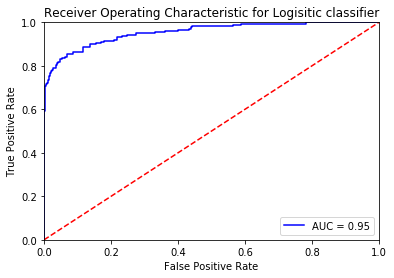

In [976]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [367]:
#to save in csv
data_df.to_csv('without servicee.csv',index=False,encoding='utf-8-sig')

In [446]:
#remove the "else" class
data_df=data_df[data_df['reason'] != "servicee"]

In [447]:
len(data_df)

2799

In [448]:
#to save in csv
data_df.to_csv('Data.csv',index=False,encoding='utf-8-sig')

In [449]:
# Q: How many tweets have positive sentiment and how many have negative sentiment
tweets_by_sentiment = data_df['sentiment'].value_counts()

In [450]:
len(data_df)

2799

In [431]:
#first, we need to convert the date column to a datetime object
data_df["Date_Time"]=pd.to_datetime(data_df['date'])

In [432]:
#creat a new data frame
Date_df= data_df[['Date_Time','sentiment']].copy()

In [433]:
# create a new column for dates
Date_df['Date'] = Date_df['Date_Time'].dt.date

In [434]:
# count unique dates
df_by_date = Date_df.groupby('Date').count()

In [435]:
df_by_date.tail()

,Date_Time,sentiment
Date,,
2020-02-11,1,1
2020-02-18,16,16
2020-02-19,23,23
2020-02-20,23,23
2020-02-21,10,10


In [436]:
# make the date as the index for the visualization 
df_by_date['Date'] = df_by_date.index

In [437]:
import plotly.express as px



fig = px.scatter(Date_df, x='Date_Time', y='sentiment',
                 title="Default Display with Gaps")
fig.show()

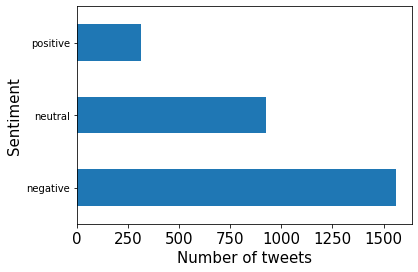

In [451]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Number of tweets', fontsize=15)
ax.set_ylabel('Sentiment' , fontsize=15)

tweets_by_sentiment.plot(ax=ax, kind='barh')